In [6]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import time
import pickle

In [7]:
def make_one_hot(labels, num_classes=10): 
    b = np.zeros((len(labels), num_classes))
    b[np.arange(len(labels)), labels] = 1
    return b

def show_sample(x, show=True, plot=plt, discrete=True):
    # TODO: reconsider this guy divide by 4?
    x = np.clip((x[:,:,:]) / 255.0, 0.0, 1.0)
    if discrete:
        x *= 255
        x = np.round(x)
        x /= 255
    
    if x.shape[2] == 1:
        plot.imshow(x[:,:,0])
    else:
        plot.imshow(x)
    if show:
        plt.show()
        
def get_mnist(orig=False):
    train_d, test_d = tf.keras.datasets.mnist.load_data()

    train = train_d[0]
    test = test_d[0]
    
    # Pad with zeros to make 32x23
    train = np.lib.pad(train, ((0, 0), (2, 2), (2, 2)), 'minimum')
    test  = np.lib.pad(test, ((0, 0), (2, 2), (2, 2)), 'minimum')
        
    if not orig:
        # convert to rgb
        train   = np.tile(np.reshape(train, (-1, 32, 32, 1)), (1, 1, 1, 3))
        test    = np.tile(np.reshape(test, (-1, 32, 32, 1)), (1, 1, 1, 3))
    else:
        train = np.expand_dims(train, axis = 3)
        test  = np.expand_dims(test, axis = 3)

    return train, train_d[1], test, test_d[1]

def get_cifar():
    train_d, test_d = tf.keras.datasets.cifar10.load_data()
    train = train_d[0]
    test = test_d[0]
    return train, train_d[1], test, test_d[1]

def split_train_val(train, train_label, validation_size=1000):

    total_count = len(train)
    train_size = total_count - validation_size
    
    val_new     = train[train_size:]
    train_new   = train[0:train_size]
    
    val_label_new   = train_label[train_size:]
    train_label_new = train_label[0:train_size]
    
    return train_new, train_label_new, val_new, val_label_new

def is_same(img_a, img_b):
    img_a = img_a.copy()
    img_b = img_b.copy()
    
    
    # discritize
    img_a = np.clip((img_a[:,:,:]) / 255.0, 0.0, 1.0)
    img_a *= 255
    img_a = np.round(img_a)
    
    img_b = np.clip((img_b[:,:,:]) / 255.0, 0.0, 1.0)
    img_b *= 255
    img_b = np.round(img_b)
    
    # check if there is any difference
    is_same = np.any(img_a - img_b)
    
    if is_same:
        return 0
    else: 
        return np.linalg.norm(img_a - img_b)

In [2]:
# train, train_label, test, test_label = get_mnist()
# train, train_label, val, val_label = split_train_val(train, train_label)
# show_sample(train[0])
# print(train_label[0])
# show_sample(val[0])
# print(val_label[0])
# show_sample(test[0])
# print(test_label[0])

In [ ]:
def visualize_staff_interpolation(sess, ph_x, tf_z, ph_inverse_z, tf_inverse_x, staff):
    fig, ax = plt.subplots(nrows=len(staff) - 1, ncols=5)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    fig.suptitle("Interpolated Faces")
    i = 0
    for row in ax:
        start = staff[i]
        end = staff[i + 1]
        i += 1

        start_latent, end_latent = sess.run(tf_z, feed_dict={ph_x: [
            start,
            end
        ]})

        interpolated_latent = [start_latent + (end_latent - start_latent) * j / 4.0  for j in range(5)]
        samples = sess.run(tf_inverse_x, feed_dict={ph_inverse_z: interpolated_latent})
        for col, sample in zip(row, samples):
            col.axis("off")
            show_sample(sample, show=False, plot=col)
    plt.show()

In [1]:
def plot_loss(loss_history, start=0):
    plt.title("Losses")
    plt.plot([l[0] for l in loss_history[start:]], label="Training", alpha=0.5)
    plt.plot(
        [x for x in range(len(loss_history[start:])) if loss_history[x + start][1] != None],
        [l[1] for l in loss_history[start:] if l[1] != None],
        label="Validation"
    )
    #plt.plot([pixelcnn_model.compute_loss(test_data)] * len(loss_history[start:]), label="Test")
    plt.legend()
    plt.ylabel("Loss (bits/dim)")
    plt.xlabel("Training Steps")
    plt.show()

In [9]:
training_data, train_label, test_data, test_label = get_mnist(orig=True)

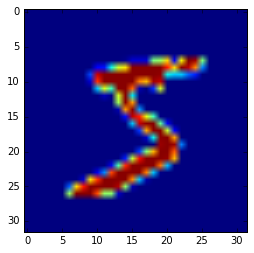

In [11]:
plt.imshow(training_data[0][:,:,0])